In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
from genGM import *
from Herding import *
from Plot_Gaussian import *
from SBQ import *

### Parameters of Mixture

In [2]:
sigma = 0.5
mus = [[1.7644,1.0278],[2.2174,-2.722],[1.0073,-0.9821],[2.1473,0.2475],[-1.9556,-3.5406],[-1.0021,3.2158],[0.9342,-0.5304],[-3.7110,-2.5693],[3.8438,-3.1127],[2.8168,-3.2514],[-3.0731,2.7305],[0.228,-2.8512],[-1.9643,-1.0489],[-1.3097,-2.8430],[-3.3647,0.795],[1.3437,-1.0198],[2.1017,-0.5647],[-1.7266,-1.7964],[-0.8518,1.4021],[2.9369,-3.3802]]
sigmas = [
    [[0.1727,0.0043],[0.0043,0.1063]],
    [[0.2909,-0.0007],[-0.0007,0.2671]],
    [[3.0541,2.3127],[2.3127,1.8809]],
    [[0.2046,0.1296],[0.1296,0.1936]],
    [[0.2325,0.3529],[0.3529,1.3044]],
    [[0.1734,-0.0208],[-0.0208,0.0712]],
    [[0.6385,0.1571],[0.1571,0.1055]],
    [[0.8177,0.5617],[0.5617,0.6469]],
    [[1.0715,0.6782],[0.6782,0.5498]],
    [[0.4471,-0.1659],[-0.1659,0.5147]],
    [[0.2294,-0.0006],[-0.0006,0.0672]],
    [[0.0842,-0.006],[-0.006,0.0672]],
    [[0.4279,0.025],[0.025,0.2014]],
    [[0.2681,0.0328],[0.0328,0.3009]],
    [[0.2463,-0.0739],[-0.0739,0.1261]],
    [[0.8137,0.4627],[0.4627,0.4359]],
    [[2.1496,1.2296],[1.2296,1.9657]],
    [[0.5496,-0.1593],[-0.1593,0.1295]],
    [[0.2417,0.1835],[0.1835,0.6737]],
    [[0.5981,0.3097],[0.3097,0.4669]]
]
p = [0.0508,0.0537,0.0343,0.0393,0.0452,0.0518,0.0285,0.0676,0.0354,0.053,0.0575,0.0527,0.0461,0.0614,0.0424,0.0532,0.0605,0.0457,0.0593,0.0614]

mus = np.array(mus)
sigmas = np.array(sigmas)

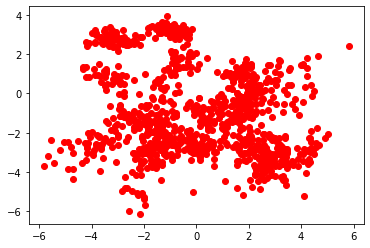

In [3]:
N = 1000
Z = np.random.multinomial(N,p)
X2 = []
for k in range(len(Z)):
    normals = np.random.multivariate_normal(mus[k],sigmas[k],size=Z[k])
    for g in normals:
        X2.append(g)
        
X2 = np.array(X2)

plt.plot(X2[:,0],X2[:,1],'ro')
plt.show()

#### Kernel with $\sigma=0.5$

In [4]:
kernel = GaussianKernel(np.array([[1,0],[0,1]])*0.5**2)
gm = GaussianMixture(p,mus,sigmas)

# gaussian mixture area
area = np.array([np.min(gm.means, axis=0), np.max(gm.means, axis=0)])

# <center>Herding</center>

In [5]:
samples = herding(100,kernel,gm,area=area,samples=[])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


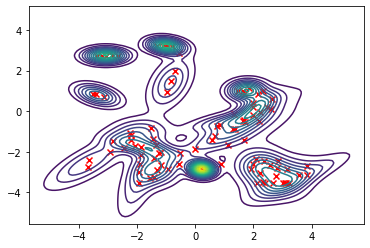

In [6]:
plotContour(gm,samples)

In [7]:
samples = herding(10,kernel,gm,area=area,samples=[])

0
1
2
3
4
5
6
7
8
9


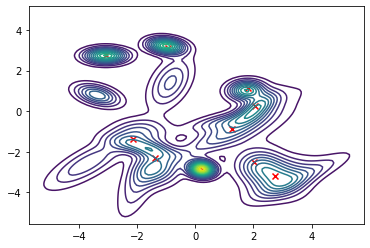

In [8]:
plotContour(gm,samples)

# <center>SBQ</center>

In [9]:
samples,gram,z = SBQ(10,kernel,gm,area=area,samples=[])

0
1
2
3
4
5
6
7
8
9


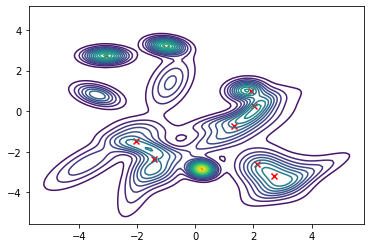

In [10]:
plotContour(gm,samples)

In [9]:
samples,gram,z = SBQ(20,kernel,gm,area=area,samples=[])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


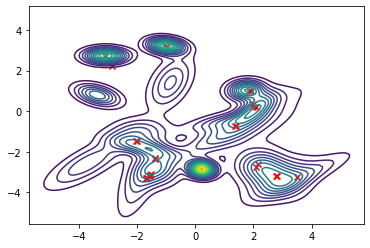

In [10]:
plotContour(gm,samples)